# Import Packages

In [1]:
import sys
sys.path.append('..')
from scipy.signal import periodogram
from statsmodels.tsa.stattools import acf, pacf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import itertools
sns.set(style="ticks")
%config IPCompleter.greedy = True
import utils 

# Import Data

In [2]:
df_calendar, df_sales, df_prices = utils.import_m5_data()

# Data Exploration

## Calendar

In [3]:
df_calendar

date  wm_yr_wk    weekday  wday  month  year       d  \
0     2011-01-29     11101   Saturday     1      1  2011     d_1   
1     2011-01-30     11101     Sunday     2      1  2011     d_2   
2     2011-01-31     11101     Monday     3      1  2011     d_3   
3     2011-02-01     11101    Tuesday     4      2  2011     d_4   
4     2011-02-02     11101  Wednesday     5      2  2011     d_5   
...          ...       ...        ...   ...    ...   ...     ...   
1964  2016-06-15     11620  Wednesday     5      6  2016  d_1965   
1965  2016-06-16     11620   Thursday     6      6  2016  d_1966   
1966  2016-06-17     11620     Friday     7      6  2016  d_1967   
1967  2016-06-18     11621   Saturday     1      6  2016  d_1968   
1968  2016-06-19     11621     Sunday     2      6  2016  d_1969   

      event_name_1 event_type_1  event_name_2 event_type_2  snap_CA  snap_TX  \
0              NaN          NaN           NaN          NaN        0        0   
1              NaN          NaN           NaN          NaN        0        0   
2              NaN          NaN           NaN          NaN        0        0   
3              NaN          NaN           NaN          NaN        1        1   
4              NaN          NaN           NaN          NaN        1        0   
...            ...          ...           ...          ...      ...      ...   
1964           NaN          NaN           NaN          NaN        0        1   
1965           NaN          NaN           NaN          NaN        0        0   
1966           NaN          NaN           NaN          NaN        0        0   
1967           NaN          NaN           NaN          NaN        0        0   
1968  NBAFinalsEnd     Sporting  Father's day     Cultural        0        0   

      snap_WI  
0           0  
1           0  
2           0  
3           0  
4           1  
...       ...  
1964        1  
1965        0  
1966        0  
1967        0  
1968        0  

[1969 rows x 14 columns]

In [4]:
print("Structure of Store:\n", df_calendar.shape, '\n')
print("Number of missing values:\n",
      df_calendar.isnull().sum().sort_values(ascending=False), "\n")

Structure of Store:
 (1969, 14) 

Number of missing values:
 event_type_2    1964
event_name_2    1964
event_type_1    1807
event_name_1    1807
snap_WI            0
snap_TX            0
snap_CA            0
d                  0
year               0
month              0
wday               0
weekday            0
wm_yr_wk           0
date               0
dtype: int64 



In [5]:
df_calendar['event_name_1'].value_counts()

StPatricksDay          6
Ramadan starts         6
Mother's day           6
SuperBowl              6
NBAFinalsEnd           6
LentStart              6
MemorialDay            6
LentWeek2              6
ValentinesDay          6
Purim End              6
PresidentsDay          6
Pesach End             6
NBAFinalsStart         6
Christmas              5
Eid al-Fitr            5
Chanukah End           5
VeteransDay            5
OrthodoxChristmas      5
Thanksgiving           5
Cinco De Mayo          5
EidAlAdha              5
Easter                 5
MartinLutherKingDay    5
ColumbusDay            5
NewYear                5
Halloween              5
IndependenceDay        5
LaborDay               5
OrthodoxEaster         5
Father's day           4
Name: event_name_1, dtype: int64

In [6]:
df_calendar['event_type_1'].value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

In [7]:
df_calendar['event_name_2'].value_counts()

Father's day      2
Easter            1
OrthodoxEaster    1
Cinco De Mayo     1
Name: event_name_2, dtype: int64

In [8]:
df_calendar['event_type_2'].value_counts()

Cultural     4
Religious    1
Name: event_type_2, dtype: int64

## Sales

In [9]:
df_sales

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_validation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_validation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_validation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_validation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_validation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  \
0         CA_1       CA    0    0    0    0  ...       1       3       0   
1         CA_1       CA    0    0    0    0  ...       0       0       0   
2         CA_1       CA    0    0    0    0  ...       2       1       2   
3         CA_1       CA    0    0    0    0  ...       1       0       5   
4         CA_1       CA    0    0    0    0  ...       2       1       1   
...        ...      ...  ...  ...  ...  ...  ...     ...     ...     ...   
30485     WI_3       WI    0    0    2    2  ...       2       0       0   
30486     WI_3       WI    0    0    0    0  ...       0       0       0   
30487     WI_3       WI    0    6    0    2  ...       2       1       0   
30488     WI_3       WI    0    0    0    0  ...       0       0       1   
30489     WI_3       WI    0    0    0    0  ...       0       0       0   

       d_1907  d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0           1       1       1       3       0       1       1  
1           0       0       1       0       0       0       0  
2           1       1       1       0       1       1       1  
3           4       1       0       1       3       7       2  
4           0       1       1       2       2       2       4  
...       ...     ...     ...     ...     ...     ...     ...  
30485       0       0       0       1       0       0       1  
30486       0       0       0       0       0       1       0  
30487       2       0       1       0       0       1       0  
30488       0       0       1       0       3       1       3  
30489       0       0       0       0       0       0       0  

[30490 rows x 1919 columns]

In [10]:
print("Structure of Store:\n", df_sales.shape, '\n')
print("Number of missing values:\n",
      df_sales.isnull().sum().sort_values(ascending=False), "\n")

Structure of Store:
 (30490, 1919) 

Number of missing values:
 d_1913    0
d_638     0
d_626     0
d_627     0
d_628     0
         ..
d_1278    0
d_1279    0
d_1280    0
d_1281    0
id        0
Length: 1919, dtype: int64 



## Prices

In [11]:
df_prices

store_id        item_id  wm_yr_wk  sell_price
0           CA_1  HOBBIES_1_001     11325        9.58
1           CA_1  HOBBIES_1_001     11326        9.58
2           CA_1  HOBBIES_1_001     11327        8.26
3           CA_1  HOBBIES_1_001     11328        8.26
4           CA_1  HOBBIES_1_001     11329        8.26
...          ...            ...       ...         ...
6841116     WI_3    FOODS_3_827     11617        1.00
6841117     WI_3    FOODS_3_827     11618        1.00
6841118     WI_3    FOODS_3_827     11619        1.00
6841119     WI_3    FOODS_3_827     11620        1.00
6841120     WI_3    FOODS_3_827     11621        1.00

[6841121 rows x 4 columns]

In [12]:
df_prices['sell_price'].describe()

count    6.841121e+06
mean     4.410952e+00
std      3.408814e+00
min      1.000000e-02
25%      2.180000e+00
50%      3.470000e+00
75%      5.840000e+00
max      1.073200e+02
Name: sell_price, dtype: float64

In [13]:
print("Structure of Store:\n", df_prices.shape, '\n')
print("Number of missing values:\n",
      df_prices.isnull().sum().sort_values(ascending=False), "\n")

Structure of Store:
 (6841121, 4) 

Number of missing values:
 sell_price    0
wm_yr_wk      0
item_id       0
store_id      0
dtype: int64 



# Transfrom Data Sets

In [14]:
# Test of function transform_dataframe
utils.transform_dataframe(df_sales.head(10), df_calendar, df_prices)

id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
19125  HOBBIES_1_006_CA_1_validation  HOBBIES_1_006  HOBBIES_1  HOBBIES   
19126  HOBBIES_1_007_CA_1_validation  HOBBIES_1_007  HOBBIES_1  HOBBIES   
19127  HOBBIES_1_008_CA_1_validation  HOBBIES_1_008  HOBBIES_1  HOBBIES   
19128  HOBBIES_1_009_CA_1_validation  HOBBIES_1_009  HOBBIES_1  HOBBIES   
19129  HOBBIES_1_010_CA_1_validation  HOBBIES_1_010  HOBBIES_1  HOBBIES   

      store_id state_id       d  sale        date  wm_yr_wk  ... month  year  \
0         CA_1       CA     d_1     0  2011-01-29     11101  ...     1  2011   
1         CA_1       CA     d_1     0  2011-01-29     11101  ...     1  2011   
2         CA_1       CA     d_1     0  2011-01-29     11101  ...     1  2011   
3         CA_1       CA     d_1     0  2011-01-29     11101  ...     1  2011   
4         CA_1       CA     d_1     0  2011-01-29     11101  ...     1  2011   
...        ...      ...     ...   ...         ...       ...  ...   ...   ...   
19125     CA_1       CA  d_1913     0  2016-04-24     11613  ...     4  2016   
19126     CA_1       CA  d_1913     1  2016-04-24     11613  ...     4  2016   
19127     CA_1       CA  d_1913     1  2016-04-24     11613  ...     4  2016   
19128     CA_1       CA  d_1913     0  2016-04-24     11613  ...     4  2016   
19129     CA_1       CA  d_1913     2  2016-04-24     11613  ...     4  2016   

       event_name_1  event_type_1 event_name_2 event_type_2 snap_CA snap_TX  \
0               NaN           NaN          NaN          NaN       0       0   
1               NaN           NaN          NaN          NaN       0       0   
2               NaN           NaN          NaN          NaN       0       0   
3               NaN           NaN          NaN          NaN       0       0   
4               NaN           NaN          NaN          NaN       0       0   
...             ...           ...          ...          ...     ...     ...   
19125           NaN           NaN          NaN          NaN       0       0   
19126           NaN           NaN          NaN          NaN       0       0   
19127           NaN           NaN          NaN          NaN       0       0   
19128           NaN           NaN          NaN          NaN       0       0   
19129           NaN           NaN          NaN          NaN       0       0   

       snap_WI  sell_price  
0            0         NaN  
1            0         NaN  
2            0         NaN  
3            0         NaN  
4            0         NaN  
...        ...         ...  
19125        0        0.96  
19126        0        7.88  
19127        0        0.48  
19128        0        1.77  
19129        0        2.97  

[19130 rows x 22 columns]

In [15]:
# Transform entire data set
# -> takes few minutes
# -> csv file is 8 GB large

# utils.transform_dataframe(df_sales, df_calendar, df_prices,data_preprocessed_dir + '/input_data_complete_merged.csv')

# Plot Time Series of an item on different Levels

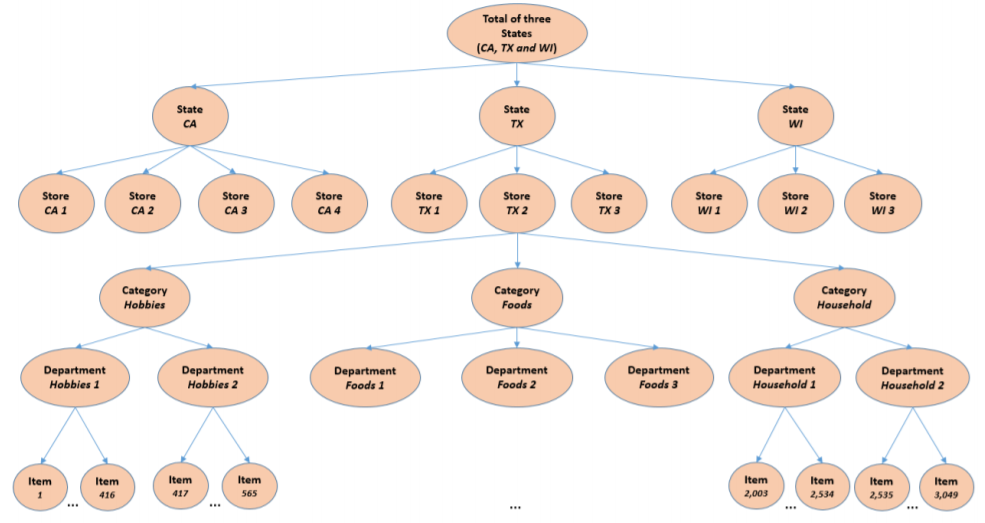

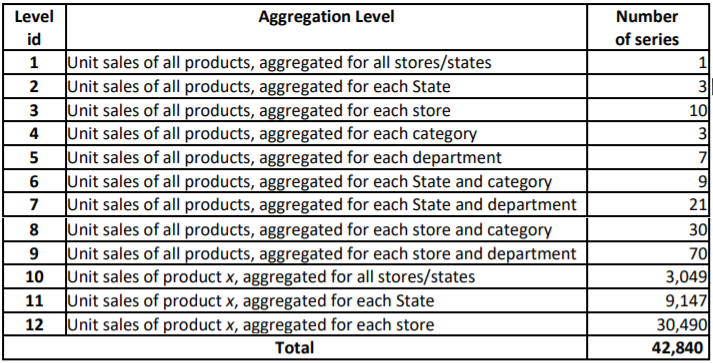

In [16]:
n_series = 20

## Unit sales of product x, aggregated for each store

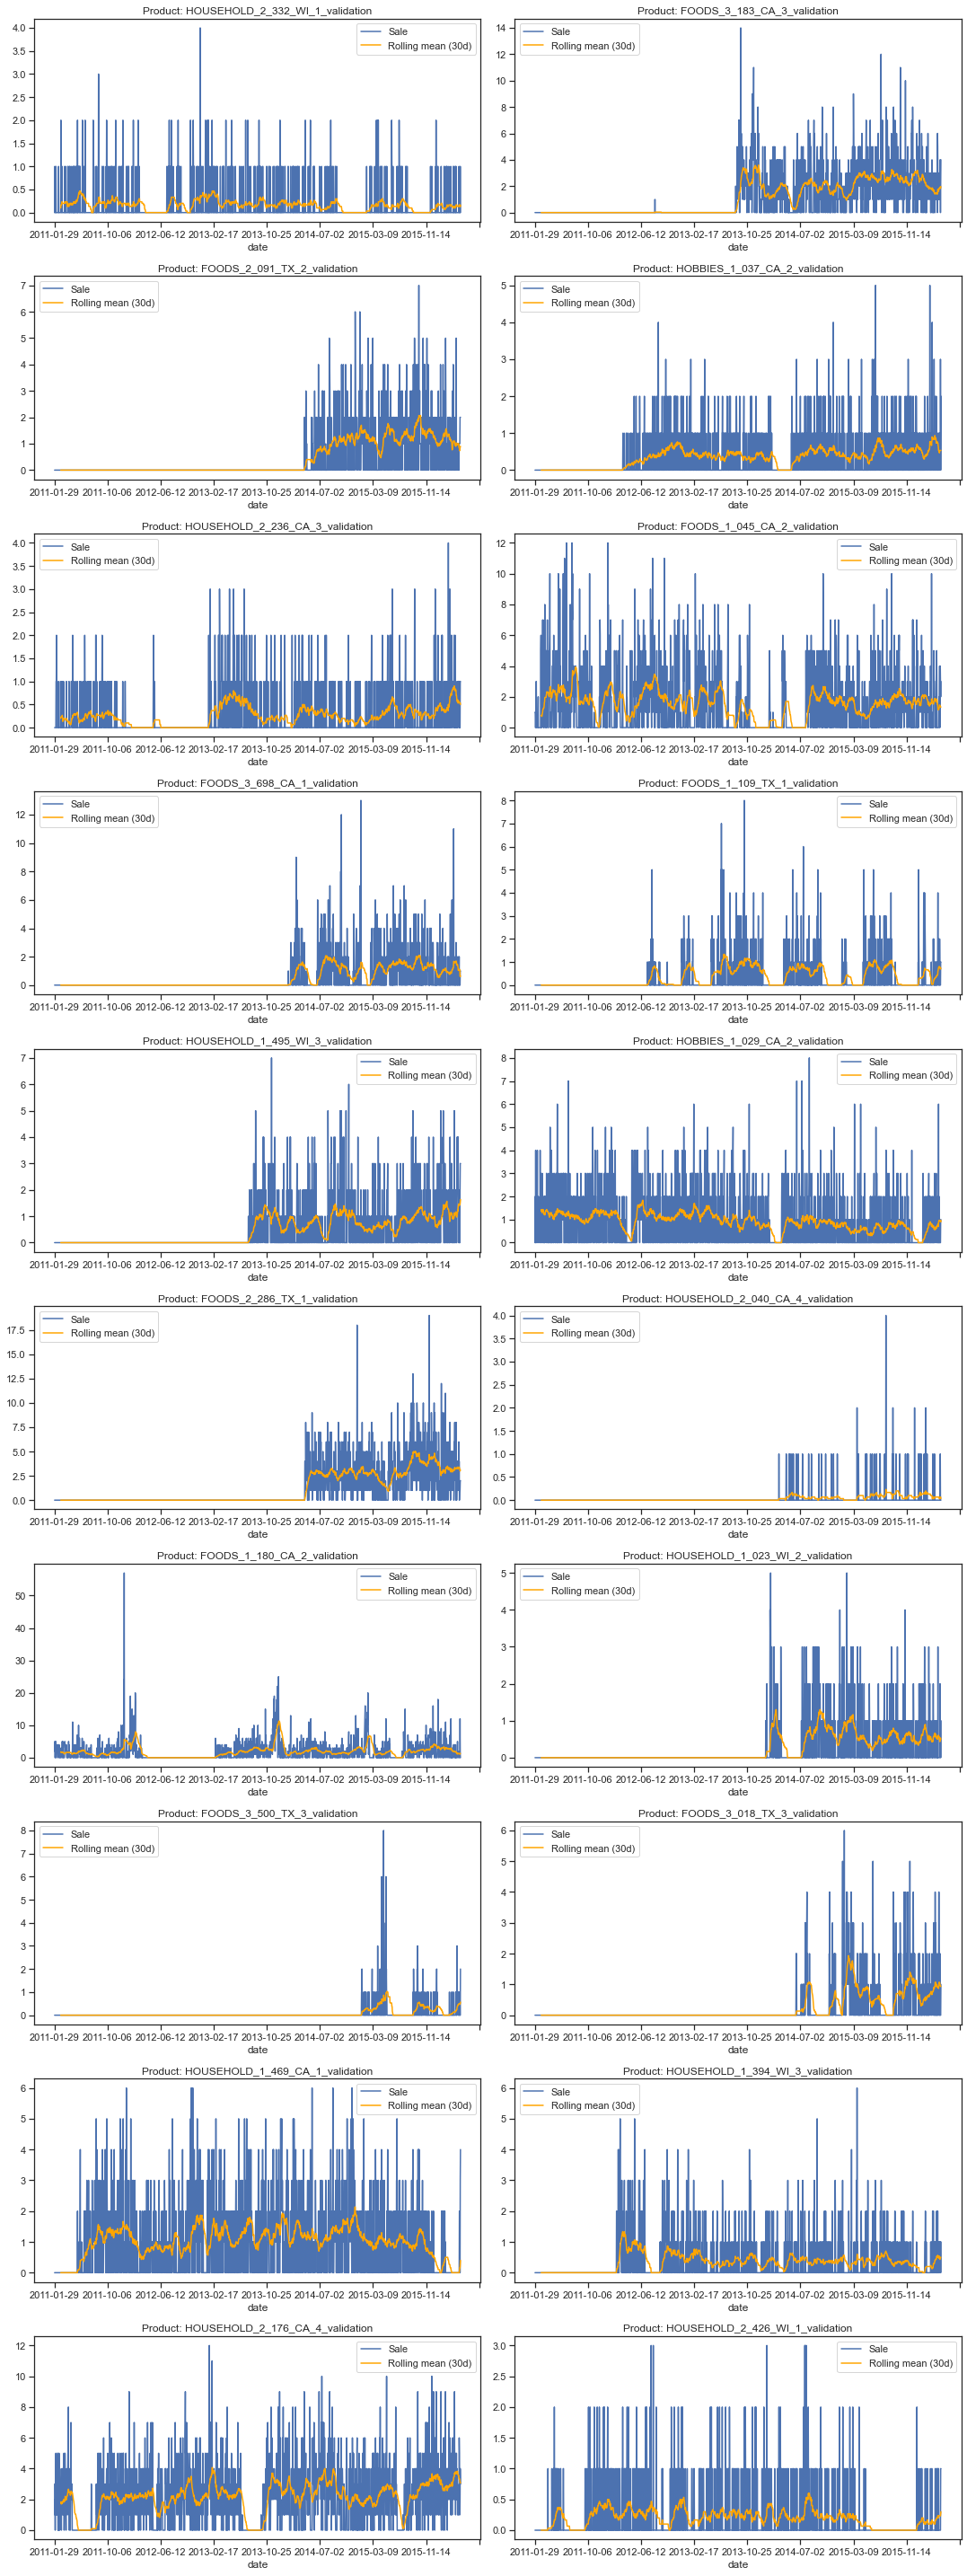

In [17]:
# Sample n random occurences
items = df_sales['id'].sample(n=n_series, random_state=1).values.tolist()

# Plot time series
fig, axs = plt.subplots(math.ceil(n_series / 2), 2, figsize=(15, n_series * 2))
axs = axs.flatten()
ax_idx = 0

for item in items:
    df = df_sales.loc[df_sales['id'] == str(item)]
    df = utils.transform_dataframe(df, df_calendar, df_prices)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Product: {item}',
                 ax=axs[ax_idx])
    roll_mean = df[['sale']].rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of product x, aggregated to a state

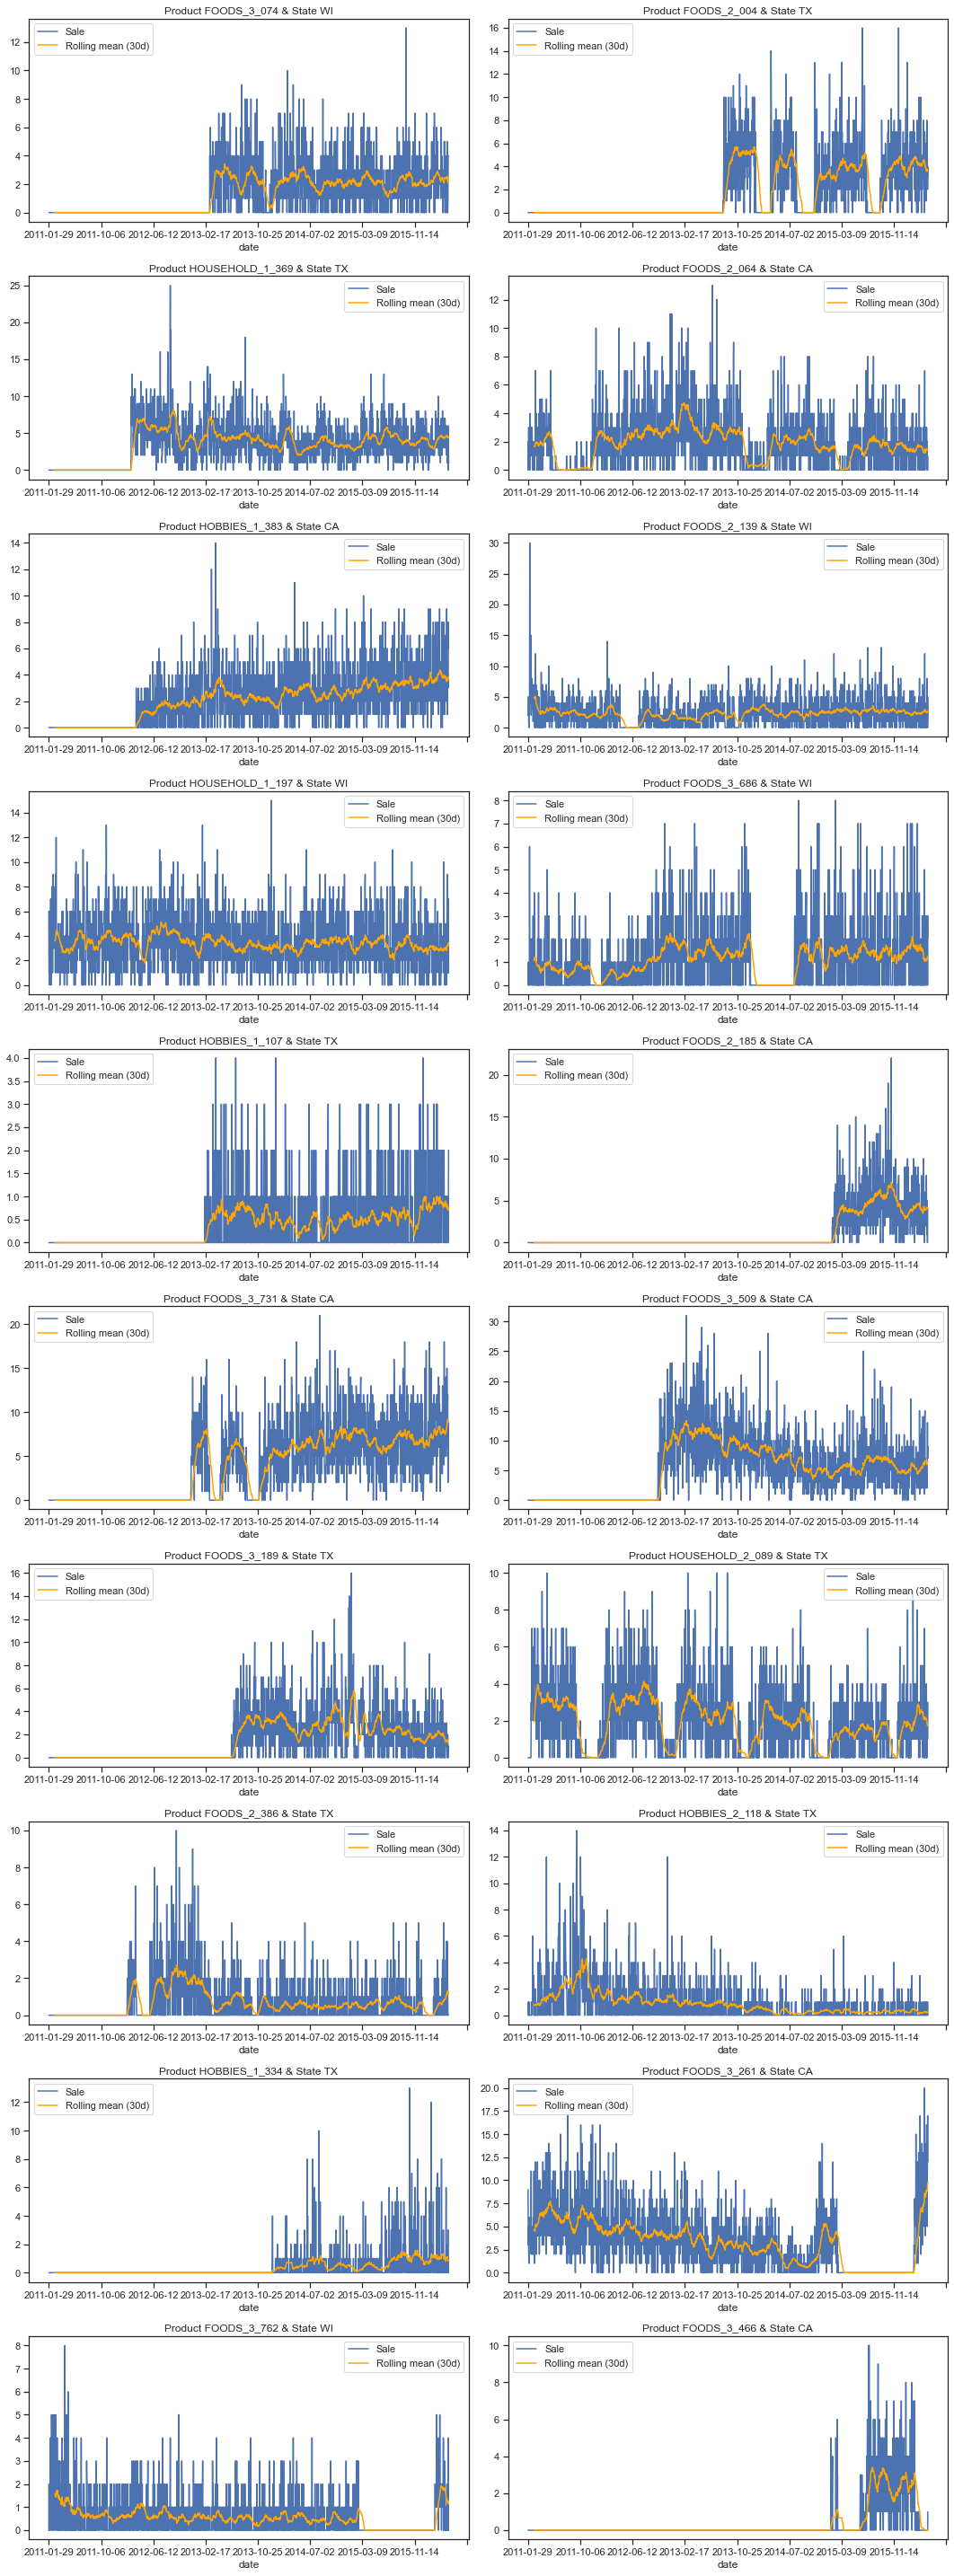

In [18]:
# Sample n random occurences
items = df_sales['item_id'].drop_duplicates()
states = df_sales['state_id'].drop_duplicates()
combinations = pd.Series(itertools.product(items, states)).sample(
    n=n_series, random_state=1).values.tolist()

# Plot time series
fig, axs = plt.subplots(math.ceil(n_series / 2), 2, figsize=(15, n_series * 2))
axs = axs.flatten()
ax_idx = 0

for item, state in combinations:
    df = df_sales.loc[df_sales['item_id'] == str(item)].loc[
        df_sales['state_id'] == str(state)]

    df = utils.transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Product {item} & State {state}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of product x, aggregated to all states and stores

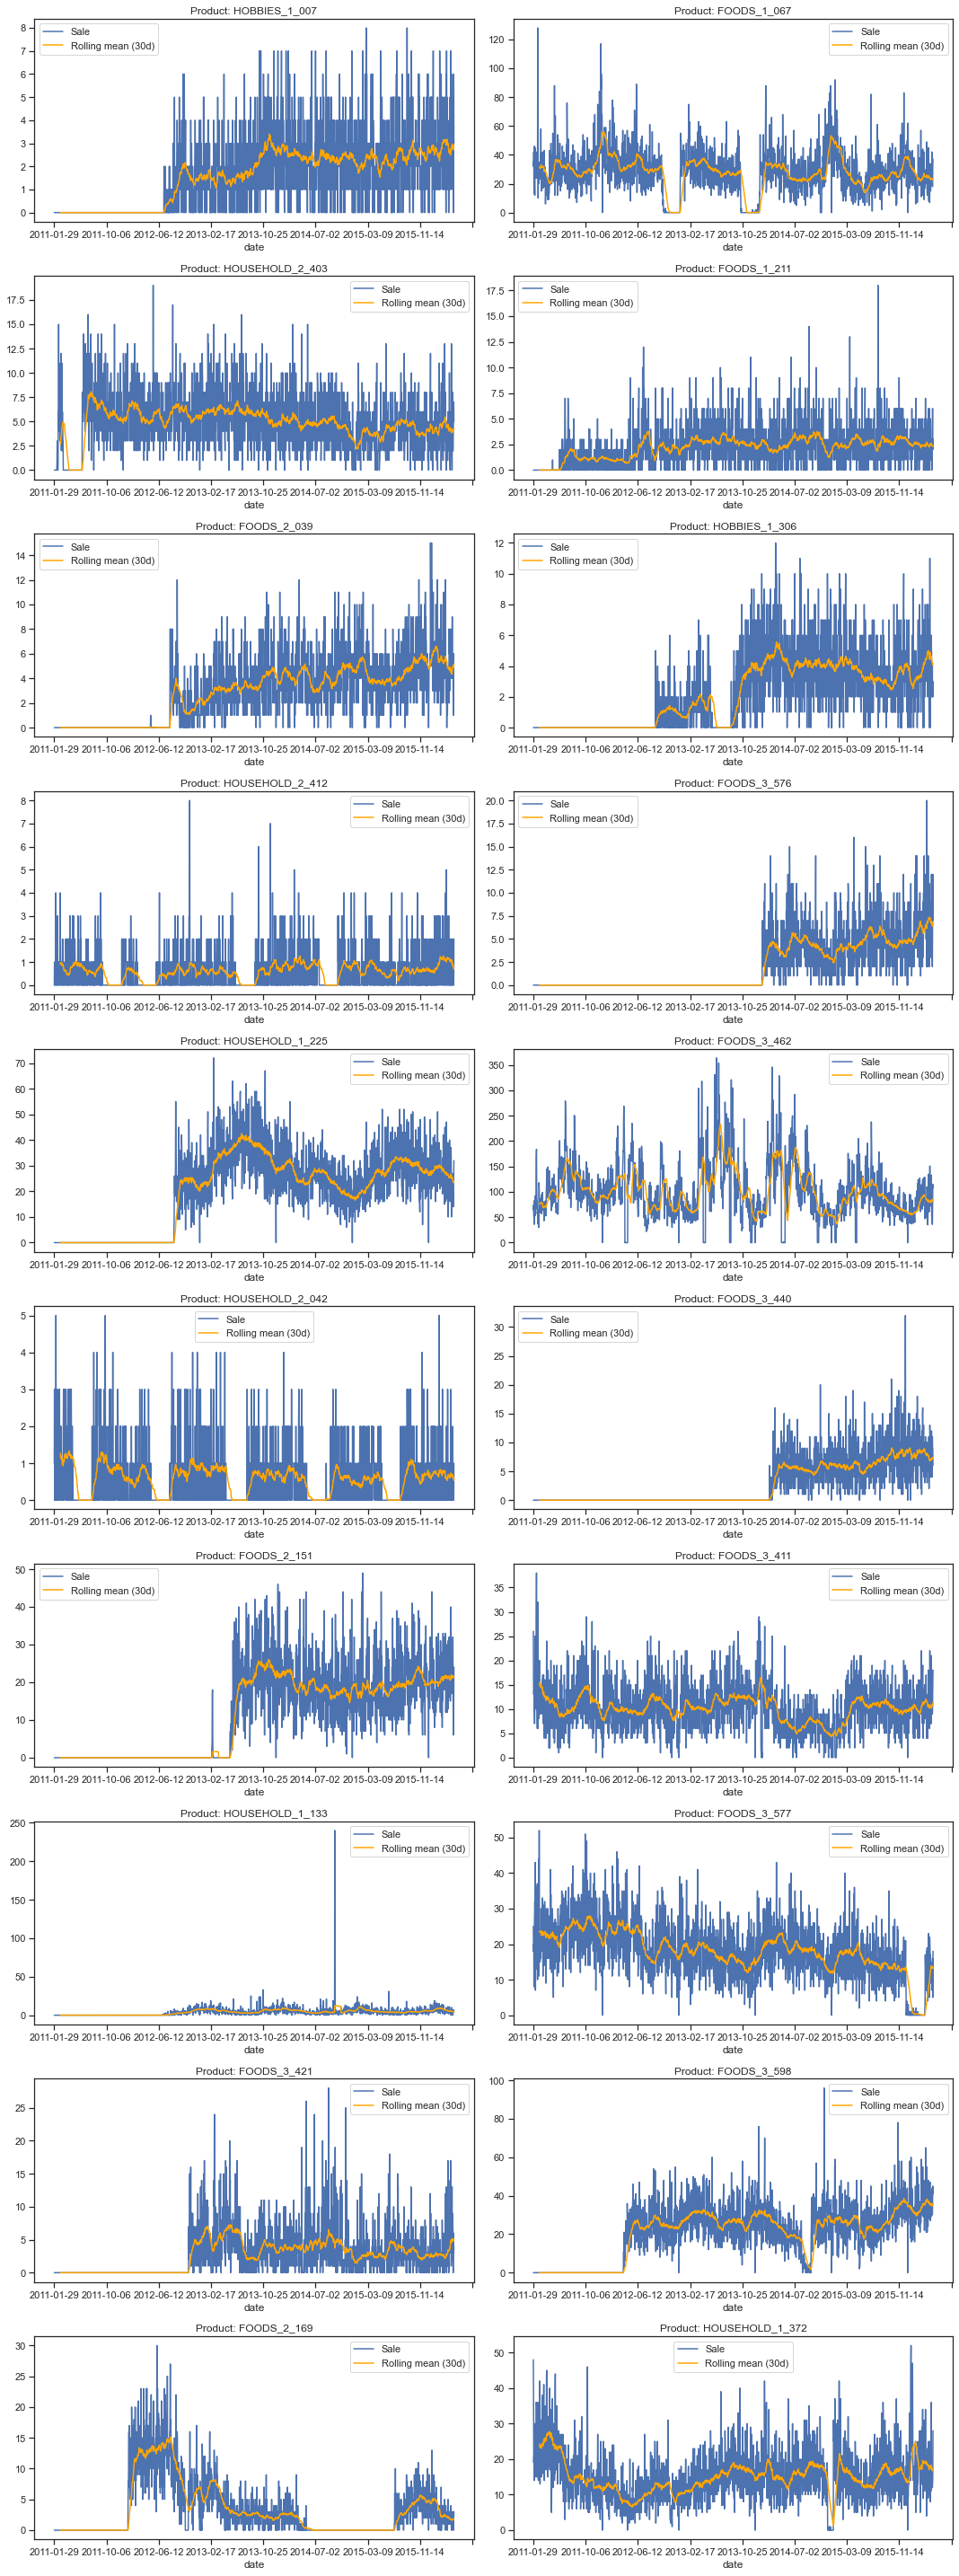

In [19]:
# Sample n random occurences
items = df_sales['item_id'].drop_duplicates().sample(
    n=n_series, random_state=1).values.tolist()

# Plot time series
fig, axs = plt.subplots(math.ceil(n_series / 2), 2, figsize=(15, n_series * 2))
axs = axs.flatten()
ax_idx = 0

for item in items:
    df = df_sales.loc[df_sales['item_id'] == str(item)]
    df = utils.transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Product: {item}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

# Plot Time Series of all items on different Levels

## Unit sales of all products, aggregated for each store and department

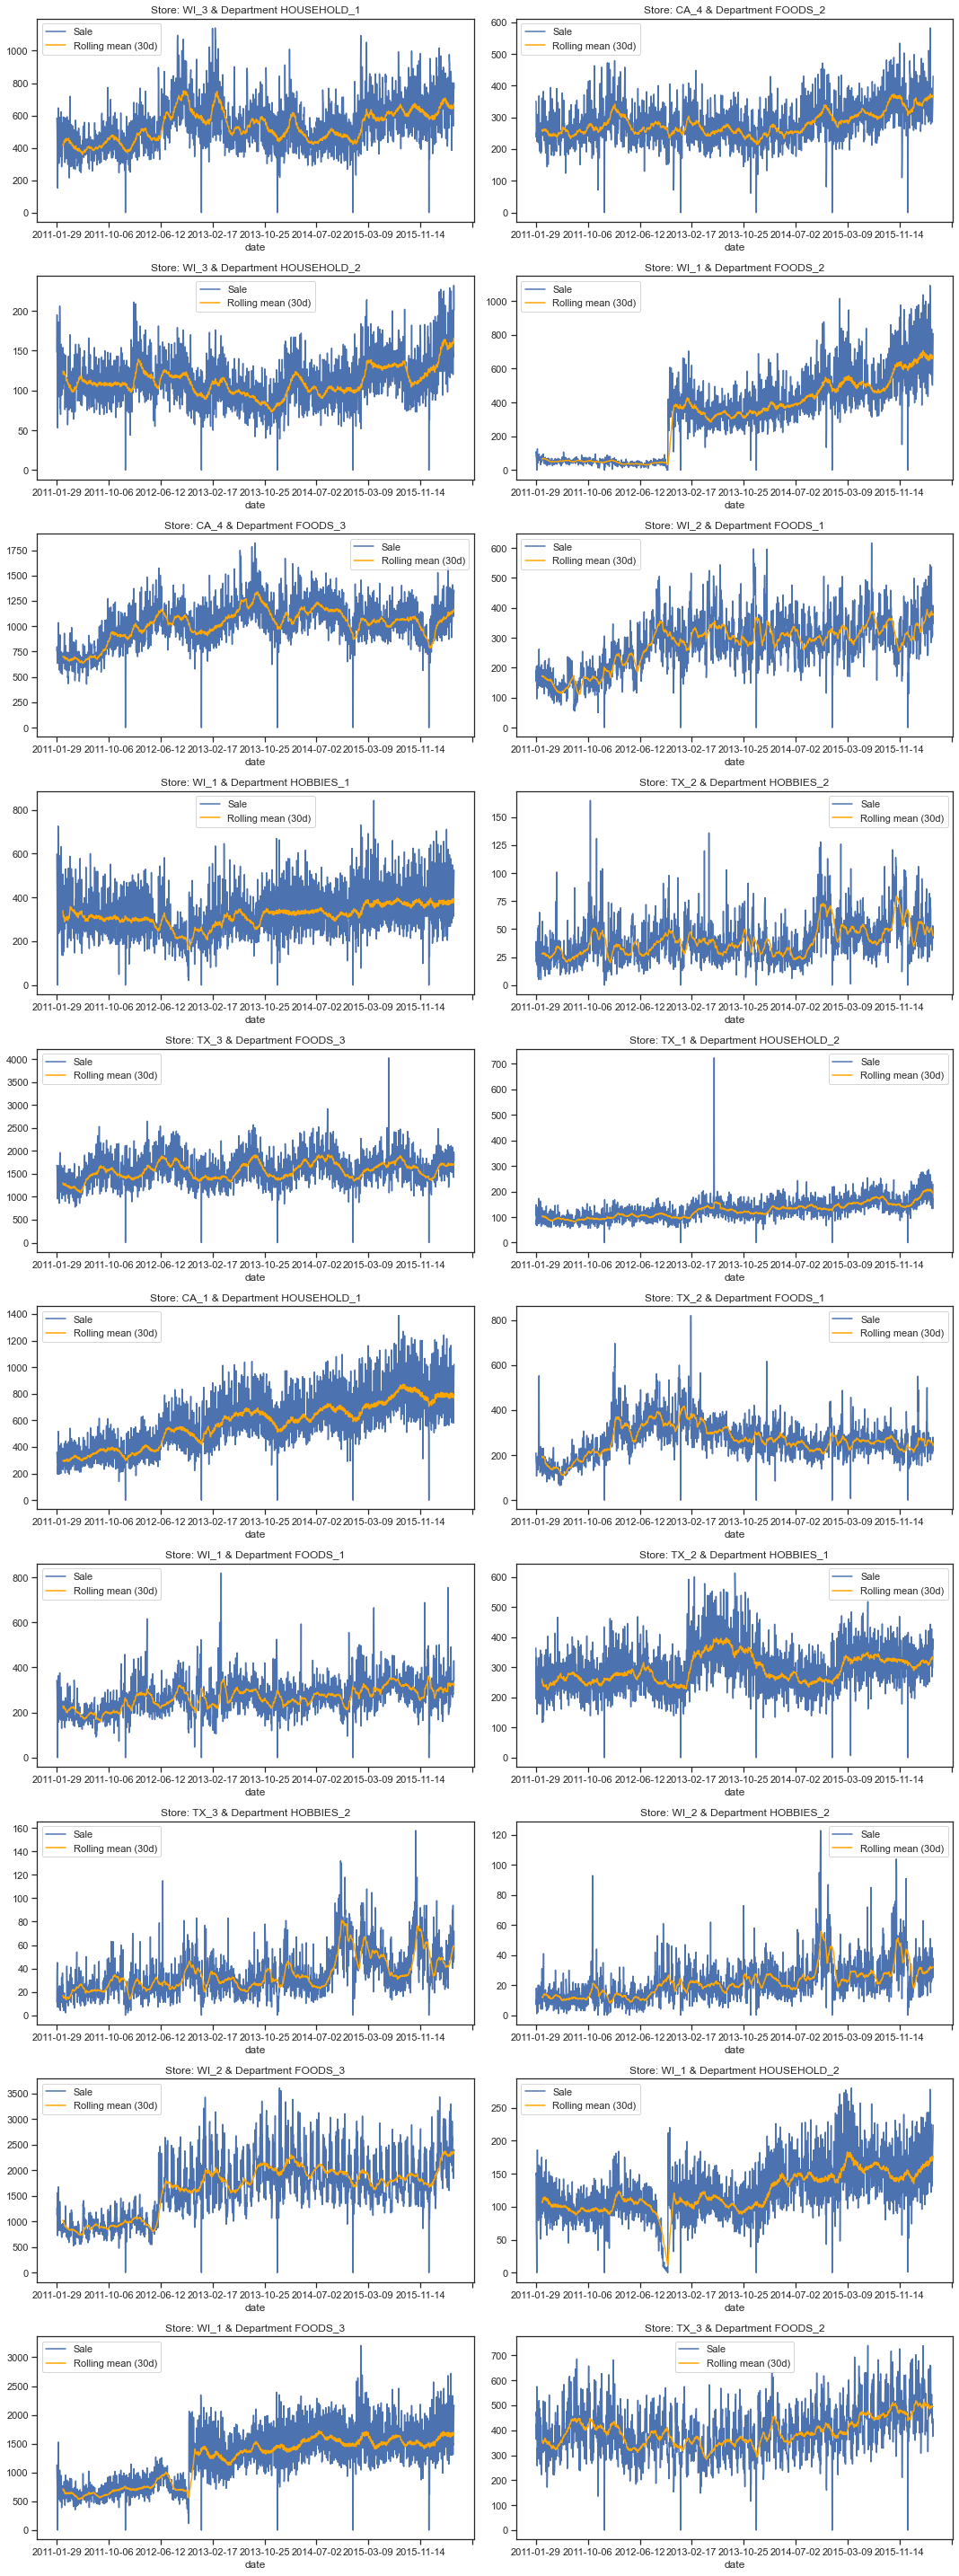

In [20]:
# Sample n random occurences
stores = df_sales['store_id'].drop_duplicates()
departments = df_sales['dept_id'].drop_duplicates()
combinations = pd.Series(itertools.product(stores, departments)).sample(
    n=n_series, random_state=1).values.tolist()

# Plot time series
fig, axs = plt.subplots(math.ceil(n_series / 2), 2, figsize=(15, n_series * 2))
axs = axs.flatten()
ax_idx = 0

for store, dept in combinations:
    df = df_sales.loc[df_sales['store_id'] == str(store)].loc[
        df_sales['dept_id'] == str(dept)]
    df = utils.transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Store: {store} & Department {dept}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each store and category

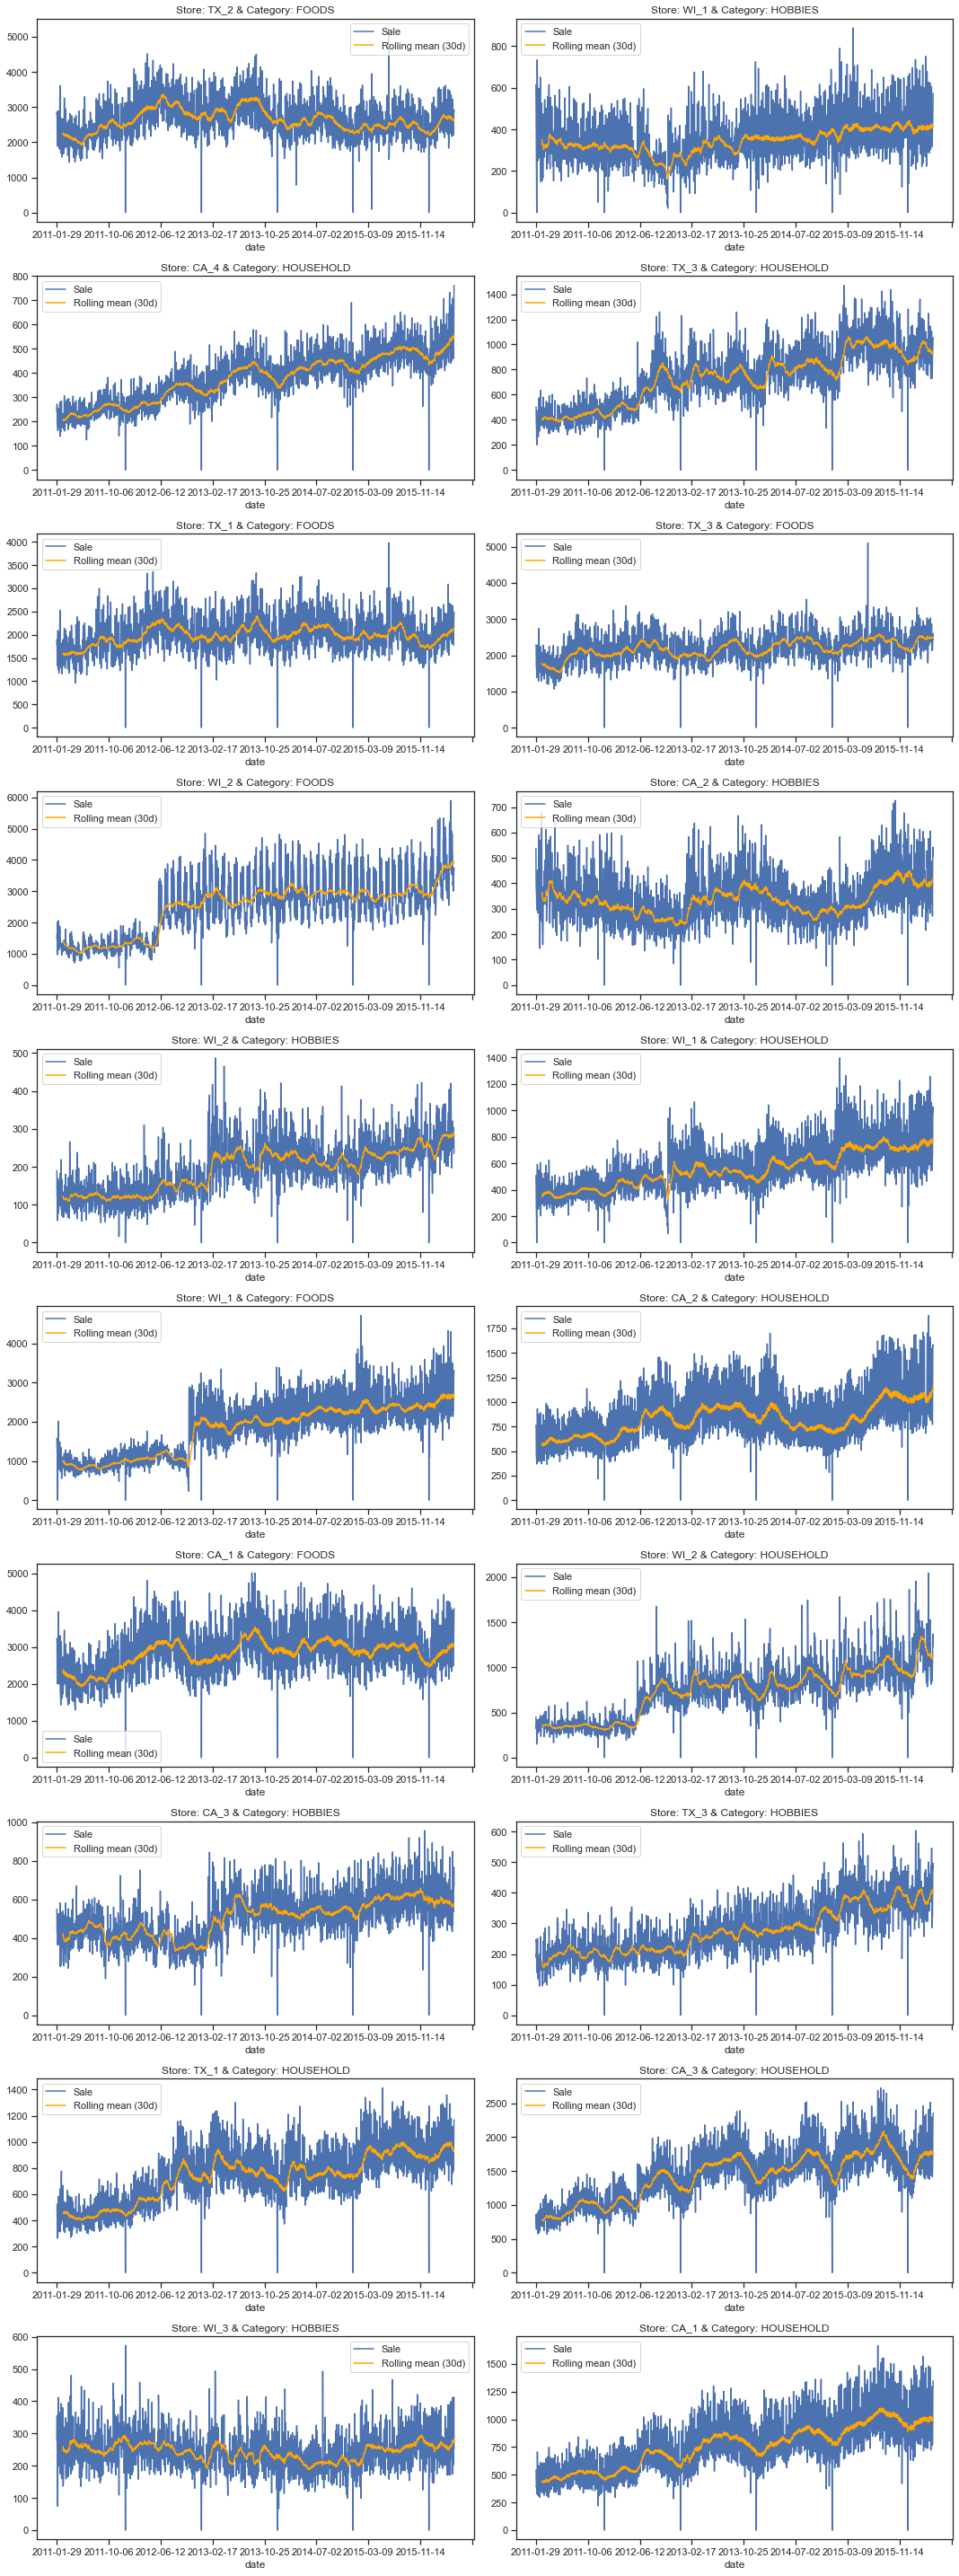

In [21]:
# Sample n random occurences
stores = df_sales['store_id'].drop_duplicates()
categories = df_sales['cat_id'].drop_duplicates()
combinations = pd.Series(itertools.product(stores, categories)).sample(
    n=n_series, random_state=1).values.tolist()

# Plot time series
fig, axs = plt.subplots(math.ceil(n_series / 2), 2, figsize=(15, n_series * 2))
axs = axs.flatten()
ax_idx = 0

for store, cat in combinations:
    df = df_sales.loc[df_sales['store_id'] == str(store)].loc[
        df_sales['cat_id'] == str(cat)]
    df = utils.transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Store: {store} & Category: {cat}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each State and department

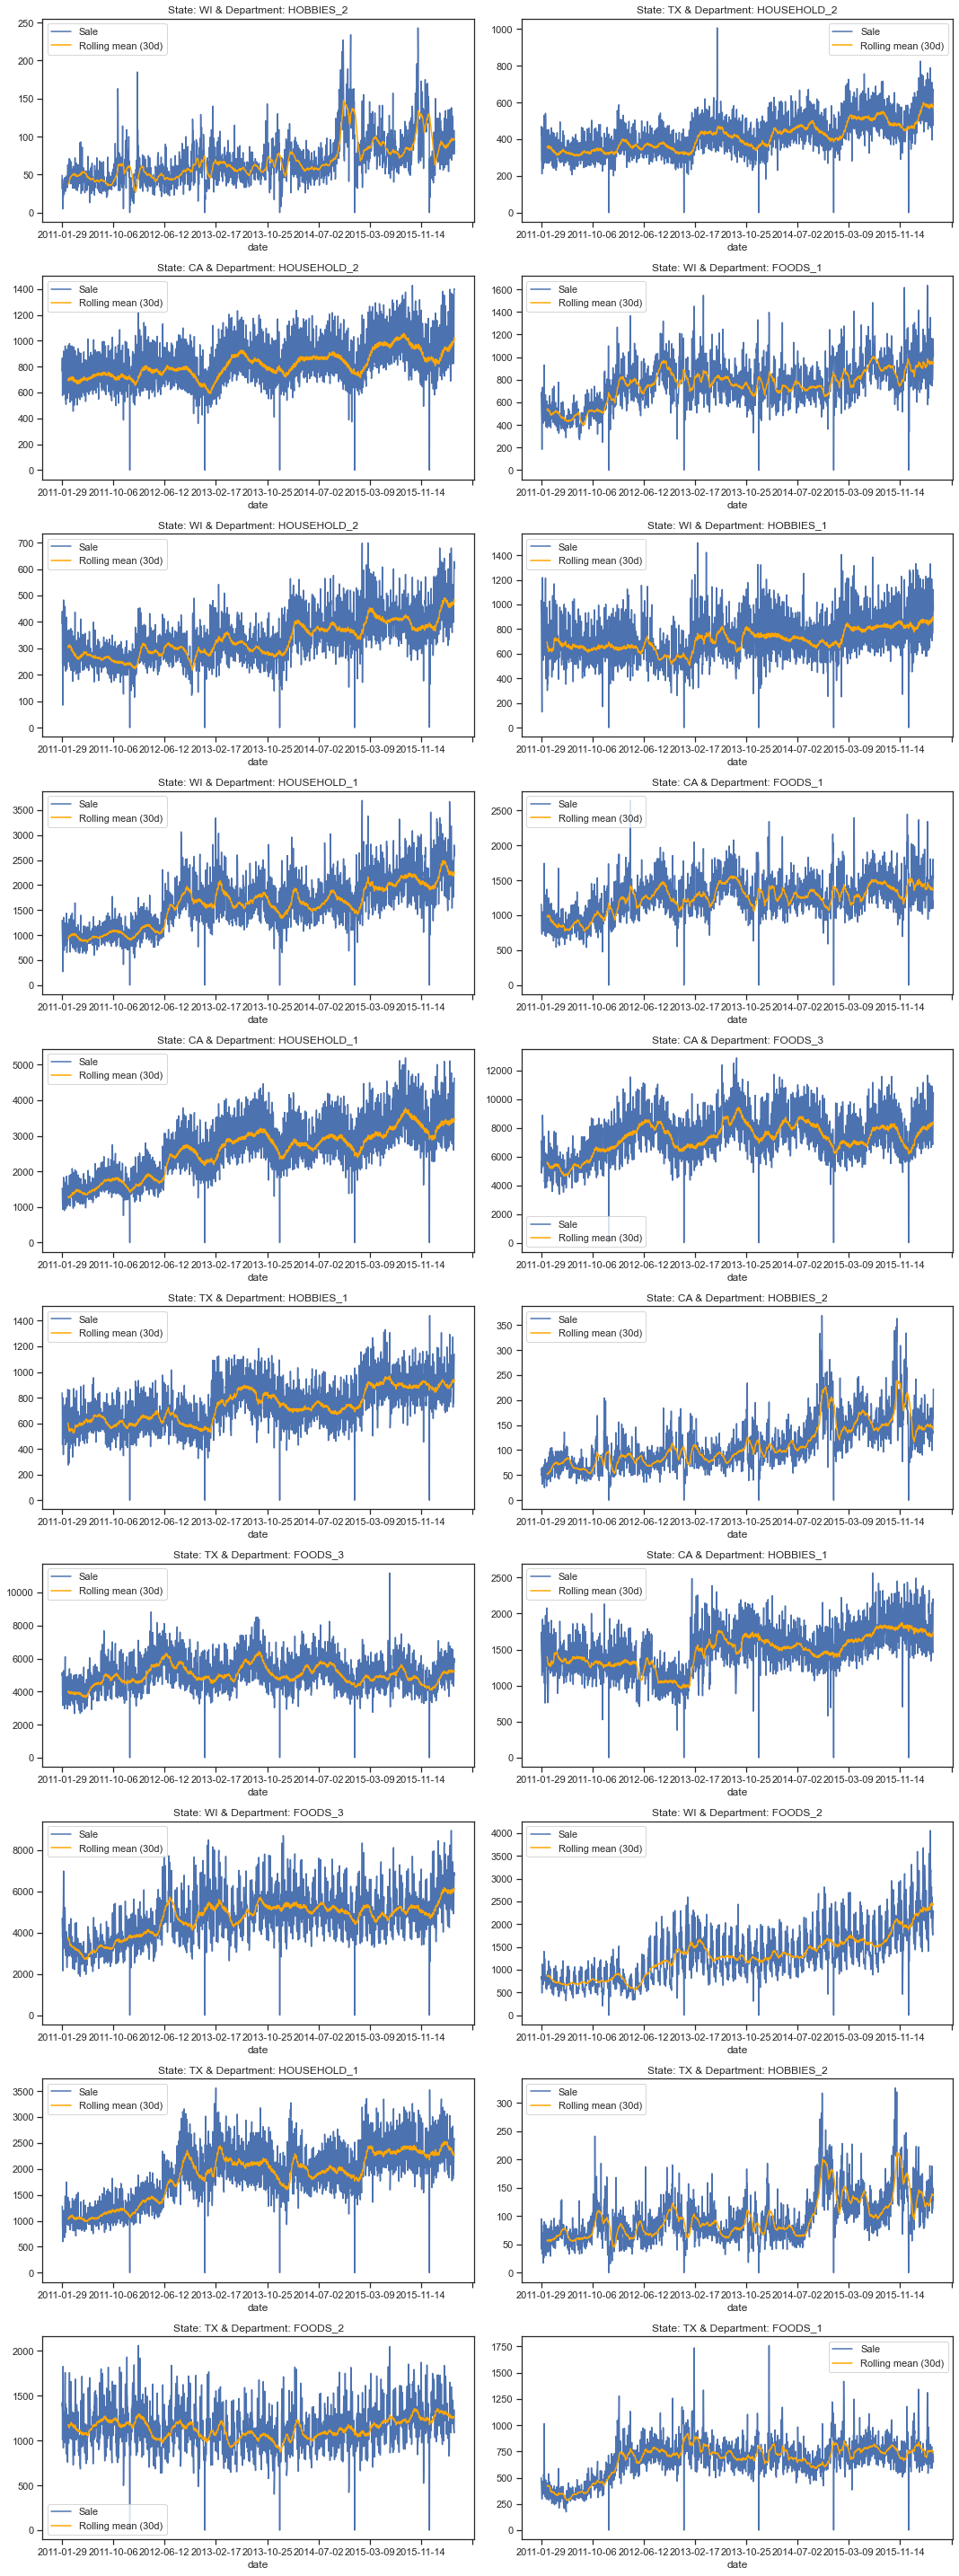

In [22]:
# Sample n random occurences
states = df_sales['state_id'].drop_duplicates()
departments = df_sales['dept_id'].drop_duplicates()
combinations = pd.Series(itertools.product(states, departments)).sample(
    n=n_series, random_state=1).values.tolist()

# Plot time series
fig, axs = plt.subplots(math.ceil(n_series / 2), 2, figsize=(15, n_series * 2))
axs = axs.flatten()
ax_idx = 0

for state, dept in combinations:
    df = df_sales.loc[df_sales['state_id'] == str(state)].loc[
        df_sales['dept_id'] == str(dept)]
    df = utils.transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'State: {state} & Department: {dept}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each State and category

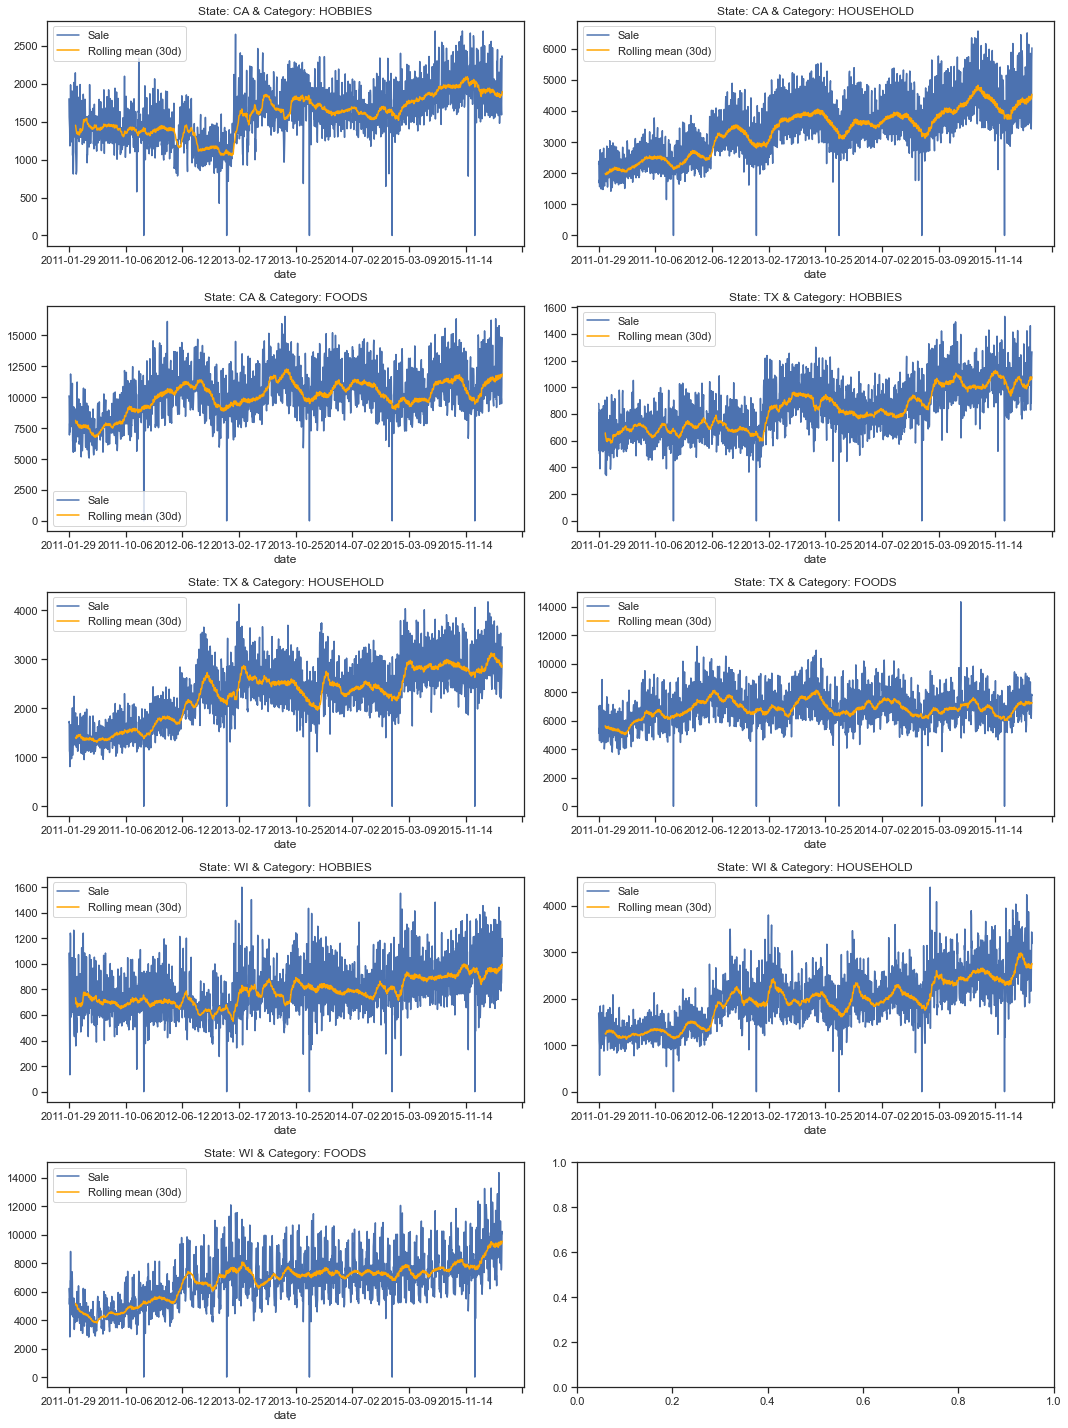

In [23]:
states = df_sales['state_id'].drop_duplicates()
categories = df_sales['cat_id'].drop_duplicates()
combinations = list(itertools.product(states, categories))

# Plot time series
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0

# for state, categorie in combinations:
for state, category in combinations:
    df = df_sales.loc[df_sales['state_id'] == str(state)].loc[
        df_sales['cat_id'] == str(category)]
    df = utils.transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'State: {state} & Category: {category}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each department

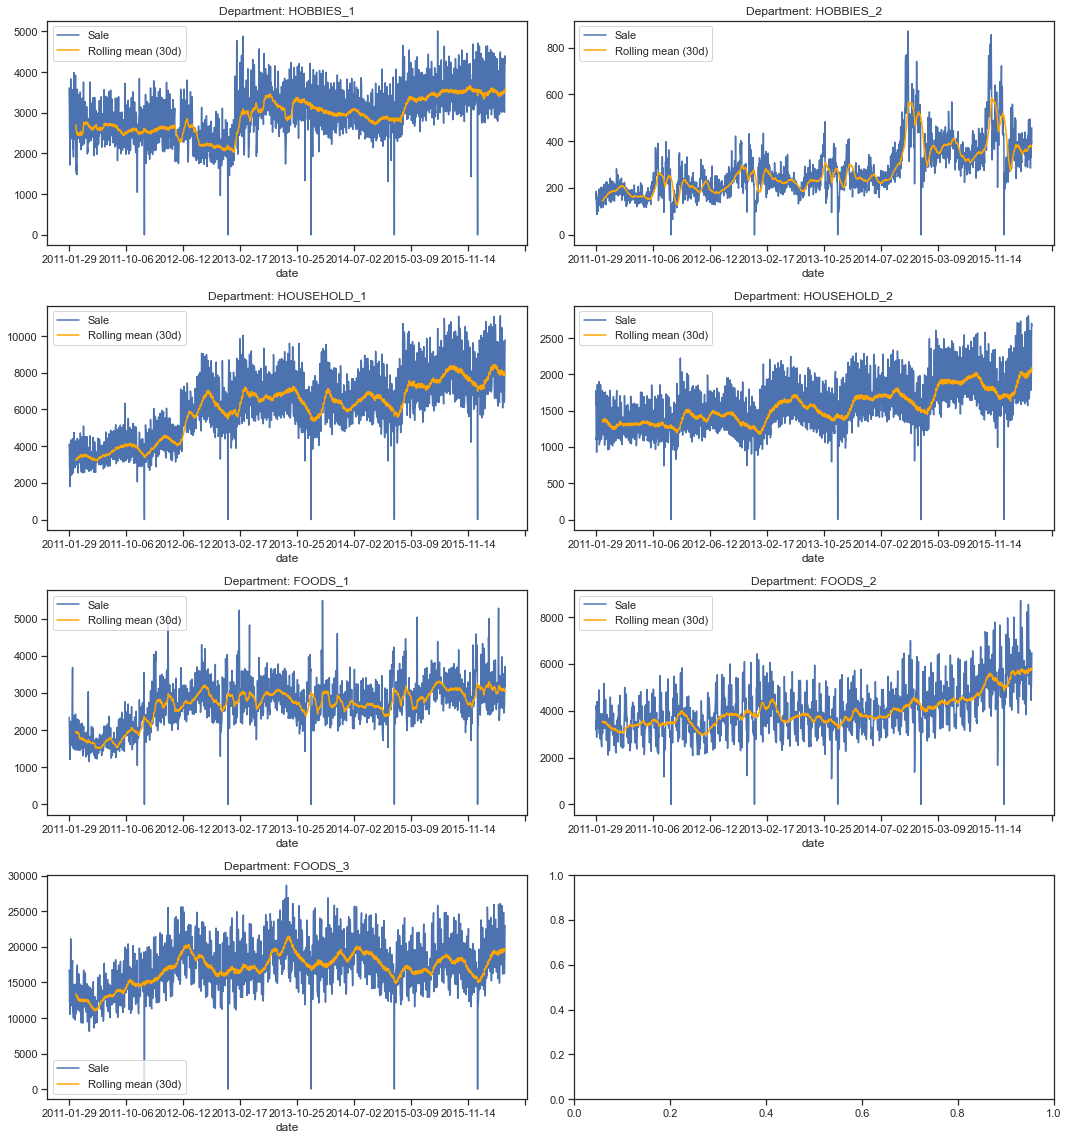

In [24]:
departments = df_sales['dept_id'].drop_duplicates()

# Plot time series
fig, axs = plt.subplots(4, 2, figsize=(15, 16))
axs = axs.flatten()
ax_idx = 0

# for state, categorie in combinations:
for dept in departments:
    df = df_sales.loc[df_sales['dept_id'] == str(dept)]
    df = utils.transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Department: {dept}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each category 

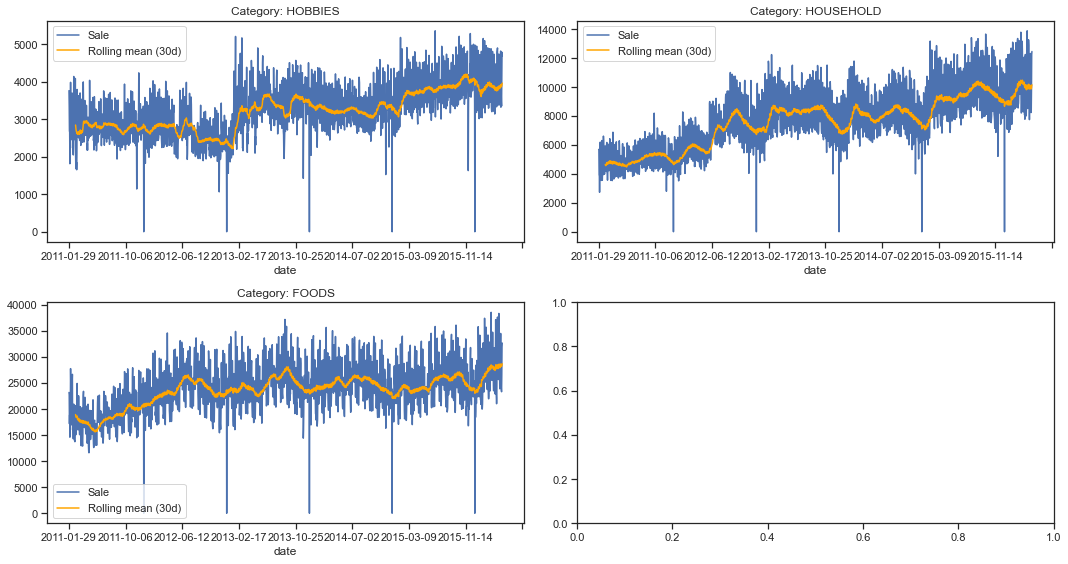

In [25]:
categories = df_sales['cat_id'].drop_duplicates()

# Plot time series
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.flatten()
ax_idx = 0

# for state, categorie in combinations:
for category in categories:
    df = df_sales.loc[df_sales['cat_id'] == str(category)]
    df = utils.transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Category: {category}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each store

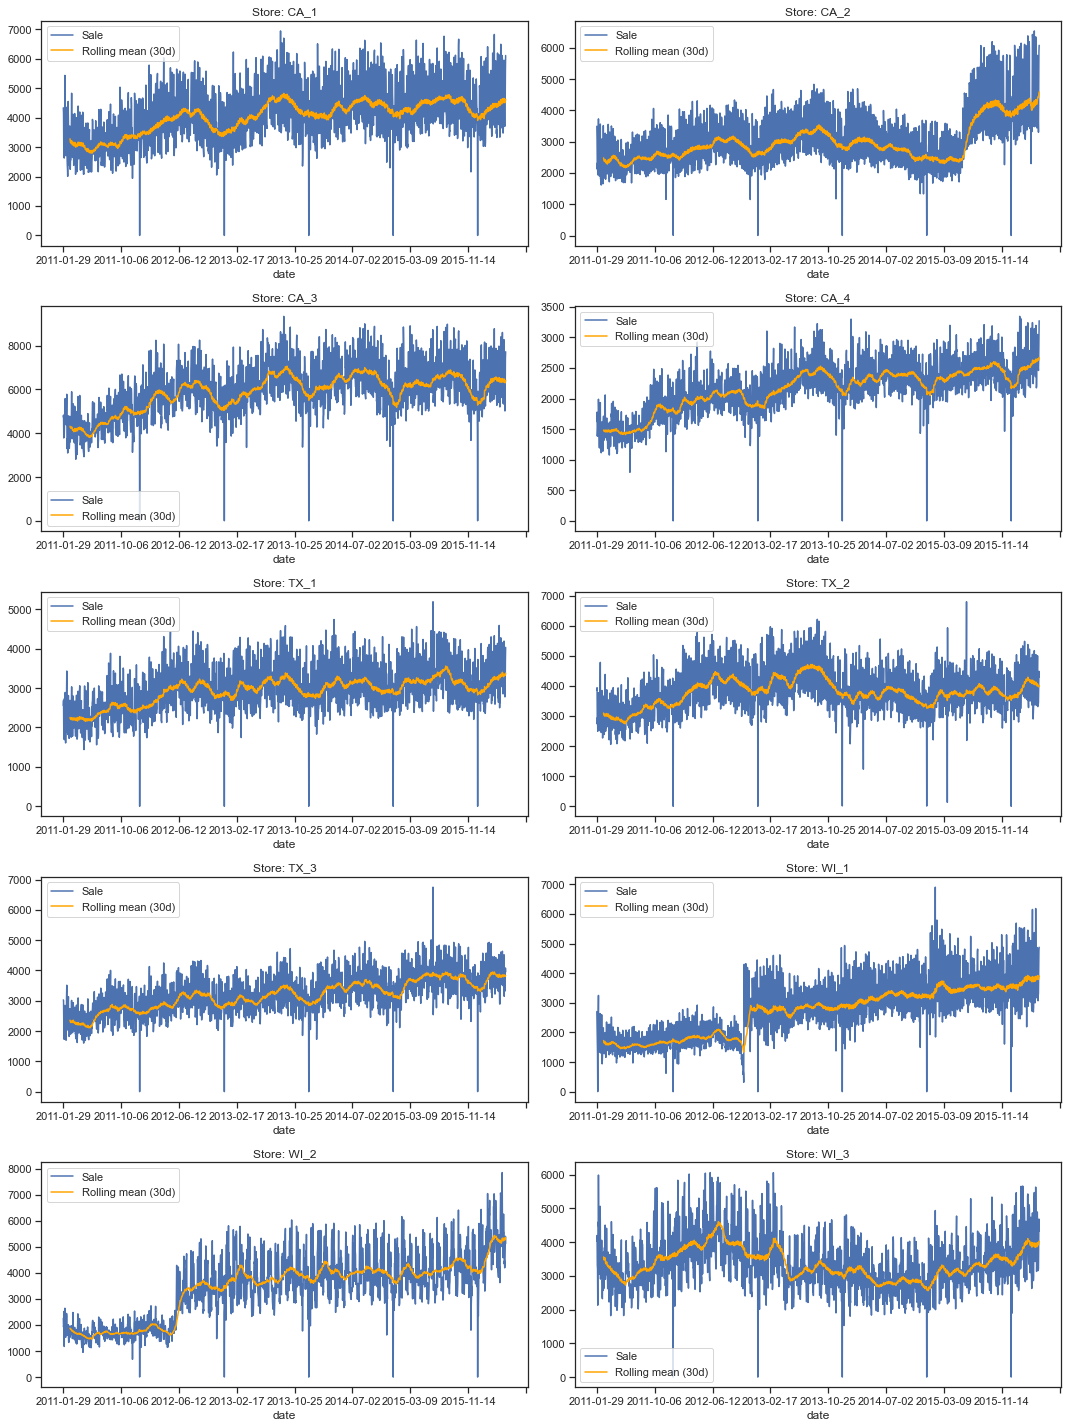

In [26]:
stores = df_sales['store_id'].drop_duplicates()

# Plot time series
fig, axs = plt.subplots(5, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0

# for state, categorie in combinations:
for store in stores:
    df = df_sales.loc[df_sales['store_id'] == str(store)]
    df = utils.transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'Store: {store}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for each State

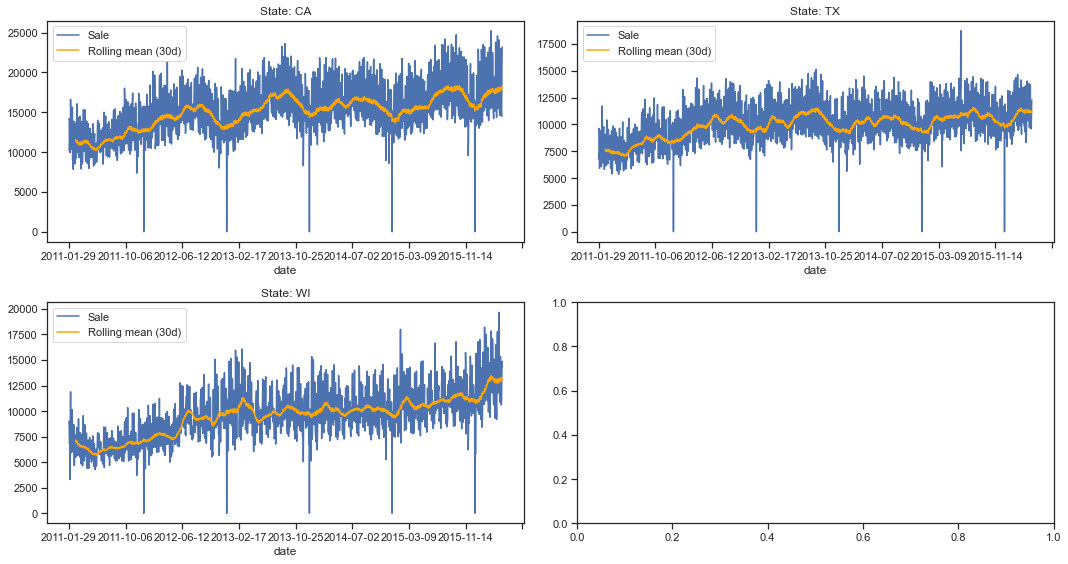

In [27]:
states = df_sales['state_id'].drop_duplicates()

# Plot time series
fig, axs = plt.subplots(2, 2, figsize=(15, 8))
axs = axs.flatten()
ax_idx = 0

# for state, categorie in combinations:
for state in states:
    df = df_sales.loc[df_sales['state_id'] == str(state)]
    df = utils.transform_dataframe(df, df_calendar, df_prices)
    df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
    df.reset_index(level=df.index.names, inplace=True)
    ax = df.plot(x='date',
                 y='sale',
                 style='-',
                 title=f'State: {state}',
                 ax=axs[ax_idx])
    roll_mean = df.rolling(30).mean()
    roll_mean.plot(ax=ax, color='orange', legend=False)
    ax.legend(['Sale', 'Rolling mean (30d)'])

    ax_idx += 1
plt.tight_layout()
plt.show()

## Unit sales of all products, aggregated for all stores/states

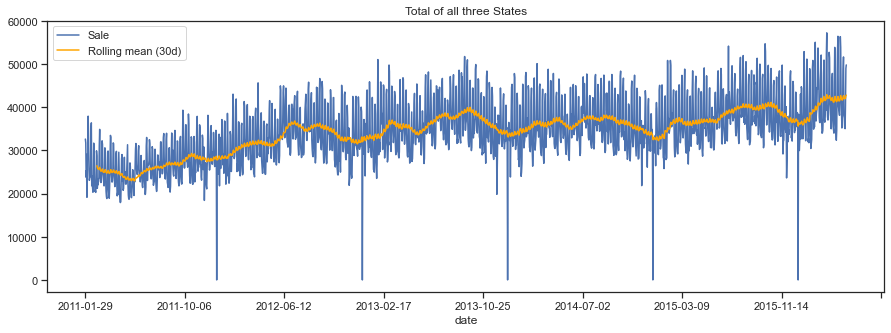

In [28]:
df = df_sales
df = utils.transform_dataframe(df, df_calendar, df_prices)
df = pd.pivot_table(df, values='sale', index=['date'], aggfunc=np.sum)
df.reset_index(level=df.index.names, inplace=True)
ax = df.plot(x='date',
             y='sale',
             style='-',
             title='Total of all three States',
             figsize=(15, 5))
roll_mean = df.rolling(30).mean()
roll_mean.plot(ax=ax, color='orange', legend=False)
ax.legend(['Sale', 'Rolling mean (30d)'])